In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
from single_data_processing import SingleAssetTI
import itertools
import yfinance as yf
from pso import PortfolioPSO
from model_comparator import ModelComparator
from island_ga import IslandGGA
from single_data_processing import SingleAssetTI
from diversified_strategies import DiversifiedTradingStrategies

import datetime

In [2]:
#GROUPON  single stock downtrend
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period =2022
pSize = 10
num_iter = 15
num_runs = 2
tickers = ['GRPN']
#ticker = '1301.TW'


In [2]:
# multiple strategies diversification   
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period =2022
pSize = 10
num_iter = 20
num_runs = 2
tickers = [
        # Large cap stocks
        'AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN',
        # Different sectors
        'JPM', 'JNJ', 'PG', 'XOM', 'WMT',
        # ETFs for broader exposure
        'SPY', 'QQQ', 'IWM', 'EFA', 'GLD'
    ]

In [3]:
diversified_system = DiversifiedTradingStrategies(
    tickers=tickers,
    start_date=start_date,
    end_date=end_date,
    test_period=period
)

# Generate training returns
print("Generating diversified training strategies...")
train_data = diversified_system.generate_diversified_returns(is_training=True)

# Generate test returns
print("Generating diversified test strategies...")
val_data = diversified_system.generate_diversified_returns(is_training=False)
strategies = diversified_system.strategy_names
gtsp = IslandGGA(
                data=train_data,
                K=6,
                num_islands=5,
                m_iter=5,
                num_iter=num_iter,
                pSize=pSize,
                strategies=strategies,
                evolve_strategy='ring')
gtsp.evolve()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Loaded AAPL: 756 records


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loaded MSFT: 756 records
Loaded GOOGL: 756 records


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loaded TSLA: 756 records
Loaded AMZN: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded JPM: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded JNJ: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded PG: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded XOM: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded WMT: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded SPY: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded QQQ: 756 records


[*********************100%***********************]  1 of 1 completed


Loaded IWM: 756 records


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loaded EFA: 756 records
Loaded GLD: 756 records
Generating diversified training strategies...
Generating diversified test strategies...
Running ring


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


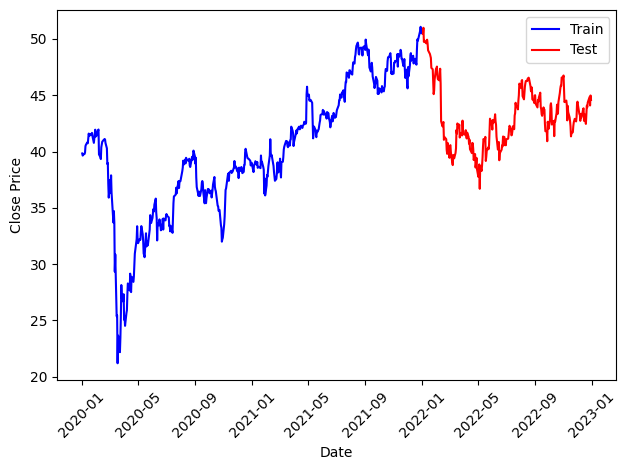

Running model:  ring
Running ring
Error in island 0 operations: operations() missing 1 required positional argument: 'q'
Error in island 1 operations: operations() missing 1 required positional argument: 'q'
Error in island 2 operations: operations() missing 1 required positional argument: 'q'
Error in island 3 operations: operations() missing 1 required positional argument: 'q'
Error in island 4 operations: operations() missing 1 required positional argument: 'q'
Generation 1: Best fitness = 0.8919514927837624  Average Fitness = 0.7526685334247096
Error in island 0 operations: operations() missing 1 required positional argument: 'q'
Error in island 1 operations: operations() missing 1 required positional argument: 'q'
Error in island 2 operations: operations() missing 1 required positional argument: 'q'
Error in island 3 operations: operations() missing 1 required positional argument: 'q'
Error in island 4 operations: operations() missing 1 required positional argument: 'q'
Generation

In [ ]:
# Usage
import traceback

try:
    # Code that raises the error
    np.random.seed(42)
    comparator = ModelComparator(stock_tickers=tickers,period=period,start_date=start_date, end_date=end_date, pSize=pSize, num_iter=num_iter, num_runs=num_runs,diversified=False)
    comparator.run_comparison()
    results_df = comparator.run_comparison()
    comparator.plot_results(results_df, comparator.optimization_approaches)
    results_df.to_csv('results/diversified/downtrend_expanded.csv')
        
except Exception as e:
    print("An error occurred:")
    traceback.print_exc()


In [ ]:
results_df = pd.read_csv('results/downtrend_twse.csv')
pd.set_option('display.max_rows', None)
results_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

In [ ]:
training_df = results_df[results_df['phase'] == 'train']
training_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

In [ ]:
validation_df = results_df[results_df['phase'] == 'validation']
validation_df.groupby([ 'model'])[[ 'returns']].mean().round(4)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply label map (replace model names)
validation_df = validation_df.copy()
validation_df["model_label"] = validation_df["model"].map({
    'gga': 'Previous Approach',
    'ring': 'IGSTP-Ring',
    'multikuti': 'IGSTP-Multikuti',
    'master_slave': 'MSGSTP',
    'pso': 'PSO'   # <-- add if you want PSO included
})

plt.figure(figsize=(8,6))
sns.boxplot(
    data=validation_df,
    x="model_label", 
    y="returns",
    palette="Set2",
    width=0.6,
    fliersize=3
)
sns.stripplot(
    data=validation_df, 
    x="model_label", 
    y="returns",
    color="black", 
    alpha=0.6, 
    jitter=0.2,
    size=3
)

#plt.title("Validation Returns by Model", fontsize=14, weight="bold")
plt.ylabel("Returns", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


In [ ]:
import pandas as pd
df = results_df.copy()
# ---- Returns stats ----
returns_stats = (df
    .groupby(["model", "phase"])
    .agg(
        mean=("returns", "mean"),
        std=("returns", "std"),
        min=("returns", "min"),
        max=("returns", "max")
    )
    .round(4)
    .reset_index()
)

# ---- MDD stats ----
mdd_stats = (df
    .groupby(["model", "phase"])
    .agg(
        mean=("mdd", "mean"),
        std=("mdd", "std"),
        min=("mdd", "min"),
        max=("mdd", "max")
    )
    .round(4)
    .reset_index()
)

print("=== Returns Stats ===")
print(returns_stats)

print("\n=== MDD Stats ===")
print(mdd_stats)
                           

In [ ]:
import pandas as pd                                   

# Example datasets: df_down, df_side, df_up
df_down = pd.read_csv('results/downtrend_twse.csv')
df_up = pd.read_csv('results/uptrend_k2_twse.csv')
df_side = pd.read_csv('results/sideways_twse.csv')
datasets = {
    "Downtrend": df_down,
    "Sideways": df_side,
    "Uptrend": df_up
}

label_map = {
    'gga': 'Previous Approach',
    'ring': 'IGTSP-Ring',
    'multikuti': 'IGTSP-Multikuti',
    'master_slave': 'MSGSTP',
    'pso': 'PSO'
}

model_order = ['IGTSP-Ring', 'IGTSP-Multikuti', 'MSGSTP', 'Previous Approach', 'PSO']

# Map labels in each dataset
for key in datasets:
    datasets[key]["model"] = datasets[key]["model"].map(label_map).fillna(datasets[key]["model"])
    datasets[key]["model"] = pd.Categorical(datasets[key]["model"], categories=model_order, ordered=True)

# Function to generate LaTeX table in old style (Train/Validation as separate rows)
def generate_latex_table_old_style(metric="returns", caption="", label=""):
    rows = []
    for model in model_order:
        # Collect Train and Validation per dataset
        train_vals = []
        val_vals = []
        for dataset_name, df in datasets.items():
            train_mean = df.loc[(df["model"]==model) & (df["phase"]=="train"), metric].mean()
            val_mean   = df.loc[(df["model"]==model) & (df["phase"]=="validation"), metric].mean()
            train_vals.append(train_mean)
            val_vals.append(val_mean)
        # Compute overall mean
        train_overall = sum(train_vals)/len(train_vals)
        val_overall   = sum(val_vals)/len(val_vals)
        # Append two rows: Train and Validation
        rows.append([model, "Train", *train_vals, train_overall])
        rows.append([model, "Validation", *val_vals, val_overall])
    
    # Column names
    col_names = ["Method", "Phase"] + [f"{d}" for d in datasets.keys()] + ["Mean"]
    
    df_table = pd.DataFrame(rows, columns=col_names)
    
    # LaTeX with Styler
    styler = df_table.style.format(precision=4).hide(axis="index").set_caption(caption)
    return styler.to_latex(hrules=True, label=label, position="htbp")

# --- Generate Returns Table ---
latex_returns = generate_latex_table_old_style(
    metric="returns",
    caption="Returns across models for Downtrend, Sideways, and Uptrend datasets.",
    label="tab:returns_all"
)
print(latex_returns)

# --- Generate MDD Table ---
latex_mdd = generate_latex_table_old_style(
    metric="mdd",
    caption="Maximum Drawdown (MDD) across models for Downtrend, Sideways, and Uptrend datasets.",
    label="tab:mdd_all"
)
print(latex_mdd)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your datasets
df_down = pd.read_csv('results/downtrend_twse.csv')
df_up = pd.read_csv('results/uptrend_k2_twse.csv')
df_side = pd.read_csv('results/sideways_twse.csv')

datasets = {
    "Downtrend": df_down,
    "Sideways": df_side,
    "Uptrend": df_up
}

# Label mapping for better plot labels
label_map = {
    'gga': 'Previous Approach',
    'ring': 'IGTSP-Ring',
    'multikuti': 'IGTSP-Multikuti',
    'master_slave': 'MSGSTP',
    'pso': 'PSO'
}

def combine_datasets(datasets):
    """
    Combine the three separate dataframes into one with trend labels.
    """
    combined_dfs = []
    
    for trend_name, df in datasets.items():
        df_copy = df.copy()
        df_copy['trend'] = trend_name
        # Apply label mapping
        df_copy['model_label'] = df_copy['model'].map(label_map)
        combined_dfs.append(df_copy)
    
    combined_df = pd.concat(combined_dfs, ignore_index=True)
    return combined_df

def create_combined_boxplots(combined_df, figsize=(14, 6)):
    """
    Create combined box plots for returns and mdd only.
    """
    # Filter for validation phase only
    df_validation = combined_df[combined_df['phase'] == 'validation'].copy()
    
    # Set style
    plt.style.use('default')
    sns.set_style("whitegrid")
    
    # Create subplots for returns and mdd
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('Model Performance Across Market Trends (Validation Phase)', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    metrics = ['returns', 'mdd']
    metric_titles = ['Returns', 'Maximum Drawdown (MDD)']
    
    for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
        ax = axes[i]
        
        # Create box plot
        sns.boxplot(data=df_validation, x='trend', y=metric, hue='model_label', 
                   ax=ax, palette='Set2')
        
        ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel('Market Trend', fontsize=12, fontweight='bold')
        ax.set_ylabel(title, fontsize=12, fontweight='bold')
        
        # Customize legend
        if i == 0:
            ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.get_legend().remove()
        
        # Add grid
        ax.grid(True, alpha=0.3)
        ax.set_axisbelow(True)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def create_individual_boxplots(combined_df, figsize=(10, 6)):
    """
    Create individual box plots for returns and mdd.
    """
    # Filter for validation phase only
    df_validation = combined_df[combined_df['phase'] == 'validation'].copy()
    
    metrics = ['returns', 'mdd']
    metric_labels = {
        'returns': 'Returns',
        'mdd': 'Maximum Drawdown (MDD)'
    }
    
    for metric in metrics:
        plt.figure(figsize=figsize)
        
        # Create box plot
        sns.boxplot(data=df_validation, x='trend', y=metric, hue='model_label', 
                   palette='Set2')
        
        plt.title(f'{metric_labels[metric]} Distribution Across Market Trends (Validation Phase)', 
                  fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Market Trend', fontsize=14, fontweight='bold')
        plt.ylabel(metric_labels[metric], fontsize=14, fontweight='bold')
        
        # Improve legend
        plt.legend(title='Optimization Algorithm', title_fontsize=12, 
                  fontsize=11, loc='best', framealpha=0.9)
        
        # Grid and styling
        plt.grid(True, alpha=0.3)
        plt.gca().set_axisbelow(True)
        
        plt.tight_layout()
        plt.show()

def create_summary_table(combined_df):
    """Create a summary statistics table."""
    # Filter for validation phase only
    df_validation = combined_df[combined_df['phase'] == 'validation'].copy()
    
    summary_stats = df_validation.groupby(['model', 'trend']).agg({
        'returns': ['mean', 'std', 'min', 'max'],
        'mdd': ['mean', 'std', 'min', 'max']
    }).round(4)
    
    # Flatten column names
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
    
    return summary_stats

# Main execution
print("Combining datasets...")
combined_df = combine_datasets(datasets)

print(f"Combined dataset shape: {combined_df.shape}")
print(f"Models: {combined_df['model'].unique()}")
print(f"Trends: {combined_df['trend'].unique()}")
print(f"Phases: {combined_df['phase'].unique()}")

# Create box plots
print("\nCreating combined box plots...")
create_combined_boxplots(combined_df)

print("\nCreating individual box plots...")
create_individual_boxplots(combined_df)

def create_separate_trend_boxplots(combined_df, figsize=(12, 5)):
    """
    Create separate box plots for each trend.
    """
    # Filter for validation phase only
    df_validation = combined_df[combined_df['phase'] == 'validation'].copy()
    
    metrics = ['returns', 'mdd']
    metric_labels = {
        'returns': 'Returns',
        'mdd': 'Maximum Drawdown (MDD)'
    }
    
    trends = df_validation['trend'].unique()
    
    for trend in trends:
        trend_data = df_validation[df_validation['trend'] == trend]
        
        # Create subplot for each trend
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(f'{trend} Market - Model Performance (Validation Phase)', 
                     fontsize=16, fontweight='bold', y=1.02)
        
        for i, (metric, title) in enumerate(zip(metrics, metric_labels.values())):
            ax = axes[i]
            
            # Create box plot
            sns.boxplot(data=trend_data, x='model_label', y=metric, 
                       ax=ax, palette='Set2')
            
            ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
            ax.set_xlabel('Model', fontsize=12, fontweight='bold')
            ax.set_ylabel(title, fontsize=12, fontweight='bold')
            
            # Rotate x-axis labels for better readability
            ax.tick_params(axis='x', rotation=45)
            
            # Add grid
            ax.grid(True, alpha=0.3)
            ax.set_axisbelow(True)
        
        plt.tight_layout()
        plt.show()

# Generate summary statistics
print("\nGenerating summary statistics...")
summary_stats = create_summary_table(combined_df)
print("\nSummary Statistics:")
print(summary_stats)

# Create separate plots for each trend
print("\nCreating separate box plots for each trend...")
create_separate_trend_boxplots(combined_df)